In [1]:
import oci
import json
from oci.config import from_file
import base64
import json
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from PIL import Image
from io import BytesIO

from oci.ai_vision import AIServiceVisionClient
from oci.ai_vision.models import AnalyzeImageDetails
from oci.ai_vision.models import ImageObjectDetectionFeature
from oci.ai_vision.models import ImageTextDetectionFeature
from oci.ai_vision.models import InlineImageDetails


compId = ""
dataset_id = ""
namespace = "colmanhack"
config = from_file('~/.oci/config', 'DEFAULT')

ModuleNotFoundError: No module named 'oci'

In [ ]:
ai_vision_response = oci.ai_vision.AIServiceVisionClient(config=config)

### Getting a list of all the models
list_models = ai_vision_response.list_models(compartment_id=compId)
# print(list_models.data)

### Getting the model ocid
model_id = list_models.data.items[0].id
# print(model_id)

### Getting model data
get_model_response = ai_vision_response.get_model(model_id=model_id)
model_data = get_model_response.data
# print(model_data)
print(model_data.precision)




{
  "average_precision": 0.95480275,
  "compartment_id": "ocid1.compartment.oc1..aaaaaaaauuuxsp5ht3aodr7pfgwaa3rpmlqs5gcavqsv5qymfkhms64opvua",
  "confidence_threshold": 0.37,
  "defined_tags": {
    "Oracle-Tags": {
      "CreatedBy": "default/ido.ashkenazi@oracle.com",
      "CreatedOn": "2023-04-19T17:18:19.129Z"
    }
  },
  "description": null,
  "display_name": "Arabica_Coffee_Classification_Model",
  "freeform_tags": {},
  "id": "ocid1.aivisionmodel.oc1.il-jerusalem-1.amaaaaaa7qgio4qa3f4kcdjw2344usd7cf33bbylsa2uaww6blijjf2ll43a",
  "is_quick_mode": false,
  "lifecycle_details": "none",
  "lifecycle_state": "ACTIVE",
  "max_training_duration_in_hours": 24.0,
  "metrics": "{\"images\": {\"training\": 1231, \"validation\": 154, \"test\": 154}, \"metrics\": [{\"label\": \"Arabica_Coffee_Cercospora\", \"report\": [{\"mAP\": 0.860241640298135, \"confidence_report\": [{\"threshold\": 0.0, \"precision\": 0.8947368421052632, \"recall\": 0.7727272727272727}, {\"threshold\": 0.05, \"precis

In [ ]:
#### Uploading the image we want to check
import base64

encoded_string = None
with open("/Users/idoashkenazi/Desktop/Arabica_coffee_test_image.jpeg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read())

# encoded_string = None
# with open(Image, "rb") as image_file:
#     encoded_string = base64.b64encode(image_file.read())

[{'confidence': 0.69526434, 'name': 'Arabica_Coffee_Cercospora'}, {'confidence': 0.17013973, 'name': 'Arabica_Coffee_Phoma'}, {'confidence': 0.12473606, 'name': 'Arabica_Coffee_Miner'}, {'confidence': 0.0091616325, 'name': 'Arabica_Coffee_Health'}, {'confidence': 0.00069828605, 'name': 'Arabica_Coffee_Rust'}]
0.69526434


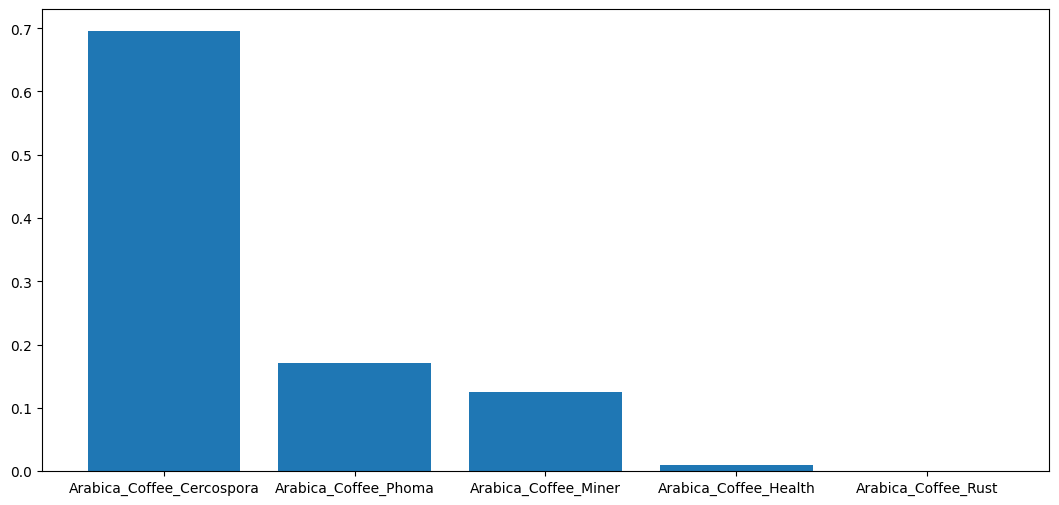

0.69526434

The result is :


In [ ]:
### Getting the model 
image_classification_feature = oci.ai_vision.models.ImageClassificationFeature()
image_classification_feature.max_results = 10
image_classification_feature.model_id = model_id

features = [image_classification_feature]

# print(image_classification_feature)


analyze_image_details = oci.ai_vision.models.AnalyzeImageDetails()
inline_image_details = oci.ai_vision.models.InlineImageDetails()
inline_image_details.data = encoded_string.decode('utf-8')
analyze_image_details.image = inline_image_details
analyze_image_details.features = features

# Send analyze image request
res = ai_vision_response.analyze_image(analyze_image_details=analyze_image_details)
# res = ai_service_vision_client.analyze_image(analyze_image_details=analyze_image_details)

# Parse Response as JSON
od_results = json.loads(str(res.data))

# print(od_results)

# print(od_results['labels'])


labels_results = od_results['labels']
print(labels_results)
print(labels_results[0]['confidence'])

x = np.array([labels_results[0]['name'], labels_results[1]['name'], labels_results[2]['name'], labels_results[3]['name'], labels_results[4]['name']])
y = np.array([labels_results[0]['confidence'], labels_results[1]['confidence'], labels_results[2]['confidence'], labels_results[3]['confidence'], labels_results[4]['confidence']])

plt.figure(figsize=(13,6))
plt.bar(x,y)
plt.show()

print(max(y))
print()

# print("The result is :")

In [ ]:

# # Create Empty DataFrame
# results_df = pd.DataFrame([], columns = ["Label", "Condifence"])

# # Extract Bounding Boxes
# od_bounding_boxes = od_results['image_objects']

# # Convert PIL to Numpy array - CV2
# cv_image = np.array(encoded_string) 
# # cv_image = np.array(IMAGE) 

# # Convert RGB to BGR - Reshape
# im = cv_image[:, :, ::-1].copy()

# # Fix colour
# im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# # Get Dimensions of Image
# height, width, channels = im.shape


# # Iterate over each Bounding Box
# for box in od_bounding_boxes:

#     # Extract opposite coordinates for bounding box
#     # Un-Normalise the Data by scaling to the max image height and width
#     # Convert to Integer
#     coordinates_pt1_x = int(box['bounding_polygon']['normalized_vertices'][0]['x'] * width)
#     coordinates_pt1_y = int(box['bounding_polygon']['normalized_vertices'][0]['y'] * height)
#     coordinates_pt2_x = int(box['bounding_polygon']['normalized_vertices'][2]['x'] * width)
#     coordinates_pt2_y = int(box['bounding_polygon']['normalized_vertices'][2]['y'] * height)

#     # Build Points as Tuples
#     coordinates_pt1 = (coordinates_pt1_x, coordinates_pt1_y)
#     coordinates_pt2 = (coordinates_pt2_x, coordinates_pt2_y)
    
#     #if box['name'] in ['Car', 'Motorcycle', 'Truck', 'Van']:

#     # Draw Bounding Boxes - Pass in Image, Top Left and Bottom Right Points, Colour, Line Thickness
#     cv2.rectangle(im, coordinates_pt1, coordinates_pt2, (0, 255, 0), 2)

#     # Plot Label just above the Top Left Point, Set Font, Size, Colour, Thickness
#     cv2.putText(im, box['name'], (coordinates_pt1_x, coordinates_pt1_y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 2)

#     # Write Image with Bounding Boxes to file
#     cv2.imwrite("./object_detection_result.png",im)

#     # Extract Label and Confidence
#     results_list = [box['name'], box['confidence']]

#     # Append Results to DataFrame
#     a_series = pd.Series(results_list, index = results_df.columns)
#     results_df = results_df.append(a_series, ignore_index=True)
    
# #         else:
# #             pass
    


In [ ]:
# def preprocess(IMAGE):
    
#     # Read in PIL Image - BytesIO Minics a File
#     buffered = BytesIO()
#     IMAGE.save(buffered, format="JPEG")
    
#     # Enocde Image
#     encoded_string = base64.b64encode(buffered.getvalue())
    
#     return encoded_string

In [ ]:
# def detect_cars(config, encoded_string):
    
#     # Max Result to return
#     MAX_RESULTS = 100

#     # Vision Service endpoint
#     endpoint = "https://vision.aiservice.eu-frankfurt-1.oci.oraclecloud.com"

#     # Initialize client service_endpoint is optional if it's specified in config
#     ai_service_vision_client = AIServiceVisionClient(config=config, service_endpoint=endpoint)
    
#     # Set up request body with one or multiple Features (Type of Service)
#     image_object_detection_feature = ImageObjectDetectionFeature()
#     image_object_detection_feature.max_results = MAX_RESULTS

#     # List of Features
#     features = [image_object_detection_feature]

#     # Create Analyze Image Object and set Image and Features
#     analyze_image_details = AnalyzeImageDetails()
#     inline_image_details = InlineImageDetails()
#     inline_image_details.data = encoded_string.decode('utf-8')
#     analyze_image_details.image = inline_image_details
#     analyze_image_details.features = features

#     # Send analyze image request
#     res = ai_service_vision_client.analyze_image(analyze_image_details=analyze_image_details)

#     # Parse Response as JSON
#     od_results = json.loads(str(res.data))
    
    
#     return od_results

In [ ]:
              
# # Authenticate against OCI
# # config = oci_authenticate('y')

# # Encoded PIL Image Recieved from Application
# encoded_string = preprocess(IMAGE)
    
# # Run Object Detection - Get Results
# od_results = detect_cars(config, encoded_string)

# # Parse Results and Draw Bounding Boxes
# im, results_df = parse_results(IMAGE, od_results)

# # Define Car Park Size
# carpark_size = 55

# # Count Vehicles in Results DF
# vehicle_count = len(results_df)

# # Calculate Utilization
# utilization = round((vehicle_count/carpark_size)*100, 2)

# # Format Response
# util_formatted = f'{utilization}%'


# # return (im, util_formatted)
    